In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from azure.storage.blob import BlobServiceClient, generate_blob_sas, BlobSasPermissions
import json

In [2]:
#enter credentials
account_name = "filmesteste"
account_access_key = "S5wta6QAtuV6yYubHeMSen4mO9CHuP3A0kIYyZmEpEWj6uUugxXzYdrpMuVGxn6Td9eQU+gmHRfw+AStpgojeQ=="
container_name = "database"
#create a client to interact with blob storage
connect_str = 'DefaultEndpointsProtocol=https;AccountName=' + account_name + ';AccountKey=' + account_access_key + ';EndpointSuffix=core.windows.net'
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
#use the client to connect to the container
container_client = blob_service_client.get_container_client(container_name)

In [3]:
def get_data(file_name):
    blob_client = container_client.get_blob_client(file_name)
    stream_downloader = blob_client.download_blob()
    stream = json.loads(stream_downloader.readall())
    #data = stream_downloader.readall()
    return pd.DataFrame(stream)

In [4]:

blob_list = []
for blob_i in container_client.list_blobs():
    blob_list.append(blob_i.name)
print(blob_list)

['df_movies_consolidated.json']


In [5]:
bases = {}
for nome_arquivo in blob_list:
    bases[nome_arquivo] = get_data(nome_arquivo)

In [6]:
#renomeando a base
df = bases['df_movies_consolidated.json']

In [7]:
generos = df.columns[20:]

In [8]:
df.describe()['year'][['min', 'max']]

min    1925.0
max    2011.0
Name: year, dtype: float64

A base de dados contém 1942 filmes num intervalo de tempo entre os anos de 1925 até 2011.

Primeiramente desejamos verificar a correlação e concentração da proporção de mulheres que participaram dos filmes presentes na base de dados em relação ao faturamento de um filme nas bilheterias.

Correlação entre porcentagem de mulheres atuando no filme e a bilheteria do filme

In [9]:
df.actress_percent.corr(df.revenue)

-0.07203031240443342

<Axes: >

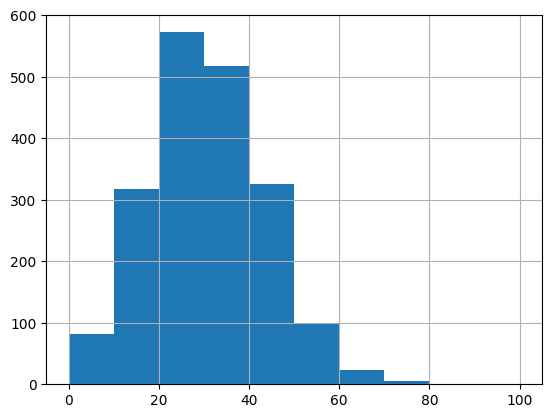

In [10]:
df.actress_percent.hist()

Correlação da porcentagem de atores em relação ao faturamento

In [11]:
df.actors_percent.corr(df.revenue)

0.07203031240443339

<Axes: >

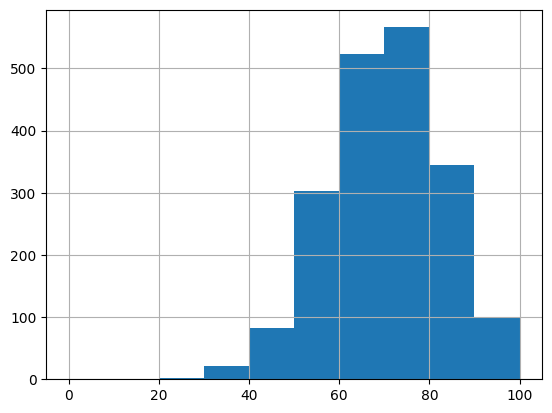

In [12]:
df.actors_percent.hist()

Como podemos observar com os histogramas acima, é possível perceber o quanto a indústria de Hollywood, considerando todos os gêneros de filmes, tende a dar mais oportunidades a atores homens, uma vez que a taxa de homens atuando em filmes é maior que a de mulheres.

A princípio, observando as correlações tanto da proporção de homens atuando quanto de mulheres, podemos observar que o fator gênero social não interfere na bilheteria do filme.

Descrição de todas as variáveis numéricas:

In [13]:
df.describe()

,year,gender_percent,actors_count,actresses_count,producer_count_male,producer_count_female,director_count,directress_count,averageRating,numVotes,...,Western,Comedy,War,Sci-Fi,Sport,History,Biography,Mystery,Film-Noir,Adult
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1.942000e+03,...,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,1998.063337,29.645726,43.122554,19.022657,5.536045,1.458290,1.059732,0.048404,6.535582,1.888411e+05,...,0.024202,0.401648,0.038105,0.147271,0.039650,0.039650,0.047889,0.106076,0.001030,0.000515
std,13.385868,12.746129,26.903560,14.393939,3.183142,1.497744,0.527976,0.217060,1.035105,2.747932e+05,...,0.153715,0.490358,0.191499,0.354467,0.195185,0.195185,0.213586,0.308014,0.032083,0.022692
min,1925.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000,3.770000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,21.000000,25.000000,10.000000,3.000000,0.000000,1.000000,0.000000,5.900000,4.163925e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,29.000000,37.000000,16.000000,5.000000,1.000000,1.000000,0.000000,6.600000,9.864800e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.000000,38.000000,54.000000,24.000000,7.000000,2.000000,1.000000,0.000000,7.200000,2.224678e+05,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2011.000000,100.000000,295.000000,135.000000,25.000000,16.000000,11.000000,2.000000,9.300000,2.800305e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Todas as análises a seguir foram feitas considerando que estamos tratando de dados com uma distribuição normal, pois a média e a mediana possuem valores muito próximos entre si.

Média de avaliação de filmes com maior participação de atrizes:

In [14]:
df[df.actress_percent > df.actors_percent].averageRating.mean()

6.4245283018867925

Média de avaliação de filmes com maior participação de atores:

In [15]:
df[df.actress_percent < df.actors_percent].averageRating.mean()

6.545424476295479

No entanto, ao comparar a média de notas de filmes em que a taxa de mulheres atuando é maior que a taxa de homens atuando não possui diferença significativa em relação a média de filmes em que a taxa de homens é maior. Logo, em termos de preferência do público, podemos dizer que o gênero não é um fator determinante para que um filme agrade ou não o público, o que levanta o questionamento do motivo pelo qual a indústria mesmo assim, abre mais portas para homens do que mulheres.

Proporção de filmes cuja a taxa de mulheres atuando é maior que a de homens:

In [16]:
participacao_maior_atrizes = df[df.actress_percent > df.actors_percent]
participacao_maior_atores = df[df.actress_percent < df.actors_percent]

Proporção de filmes cuja a taxa de mulheres atuando é maior que a de homens:

In [17]:
len(participacao_maior_atrizes)/len(df)*100

5.458290422245108

Proporção de filmes cuja a taxa de homens atuando é maior que a de mulheres:

In [18]:
len(participacao_maior_atores)/len(df)*100

93.40885684860967

In [19]:
abs(((participacao_maior_atrizes.revenue.mean() - participacao_maior_atores.revenue.mean())/participacao_maior_atrizes.revenue.mean()) * 100)

44.06788922511268

Relação entre a média de faturamento de filmes com maior participação de mulheres e filmes com maior participação de homens:

In [20]:
(participacao_maior_atrizes.revenue.mean()/participacao_maior_atores.revenue.mean())*100

69.4117200840955

Ao comparar a diferença entre as médias de bilheteria dos filmes em que a taxa de participação de mulheres atuando e de homens, é favorável para o grupo em que a taxa de homens é maior, pois a amostra é bem maior, representando cerca de 44% da média de bilheteria para os filmes cuja a taxa de mulheres é maior. No entando é curioso o quão expressiva é a média de faturamento para um grupo consideravelmente menor, cerca de 5% das amostras, capaz de fazer um valor bruto em bilheteria referente a 69% do valor da média de bilheteria do grupo de filmes com maior taxa de homens. O que nos dá um indício do que a hipótese de que isso está somente relacionado com questões sociais do que de fato a qualidade e poder de retorno financeiro dos filmes com maior porcentagem de mulheres.

Por outro lado, isso ainda não é suficiente para uma conclusão. Existem outros aspectos que podem influenciar em como o fator de gênero pode ou não afetar na bilhereria de um filme.

In [21]:
proporcao_produtoras = df[df.women_producing_percent > df.men_producing_percent]
proporcao_produtores = df[df.women_producing_percent < df.men_producing_percent]

In [22]:
porcentagem_mulheres_atuando_dado_produtora =  proporcao_produtoras.actress_percent.mean()
porcentagem_homens_atuando_dado_produtora =  proporcao_produtoras.actors_percent.mean()

In [23]:
porcentagem_mulheres_atuando_dado_produtor =  proporcao_produtores.actress_percent.mean()
porcentagem_homens_atuando_dado_produtor =  proporcao_produtores.actors_percent.mean()

In [24]:
print('Dado que o produtor é uma mulher, temos uma média de mulheres atuando de: ' + str(porcentagem_mulheres_atuando_dado_produtora))
print('Dado que o produtor é uma mulher, temos uma média de homens atuando de: ' + str(porcentagem_homens_atuando_dado_produtora))

print('Dado que o produtor é um homem, temos uma média de mulheres atuando de: ' + str(porcentagem_mulheres_atuando_dado_produtor))
print('Dado que o produtor é um homem, temos uma média de homens atuando de: ' + str(porcentagem_homens_atuando_dado_produtor))


Dado que o produtor é uma mulher, temos uma média de mulheres atuando de: 37.28260869565217
Dado que o produtor é uma mulher, temos uma média de homens atuando de: 62.71739130434783
Dado que o produtor é um homem, temos uma média de mulheres atuando de: 29.81682884945621
Dado que o produtor é um homem, temos uma média de homens atuando de: 70.18317115054379


In [25]:
porcentagem_mulheres_dirigindo_dado_produtora =  proporcao_produtoras.women_directing_percent.mean()
porcentagem_homens_dirigindo_dado_produtora =  proporcao_produtoras.men_directing_percent.mean()

In [26]:
porcentagem_mulheres_dirigindo_dado_produtor =  proporcao_produtores.women_directing_percent.mean()
porcentagem_homens_dirigindo_dado_produtor =  proporcao_produtores.men_directing_percent.mean()

In [27]:
print('Dado que o produtor é uma mulher, temos uma média de mulheres dirigindo de: ' + str(porcentagem_mulheres_dirigindo_dado_produtora))
print('Dado que o produtor é uma mulher, temos uma média de homens dirigindo de: ' + str(porcentagem_homens_dirigindo_dado_produtora))

print('Dado que o produtor é um homem, temos uma média de mulheres dirigindo de: ' + str(porcentagem_mulheres_dirigindo_dado_produtor))
print('Dado que o produtor é um homem, temos uma média de homens dirigindo de: ' + str(porcentagem_homens_dirigindo_dado_produtor))


Dado que o produtor é uma mulher, temos uma média de mulheres dirigindo de: 15.76086956521739
Dado que o produtor é uma mulher, temos uma média de homens dirigindo de: 84.23913043478261
Dado que o produtor é um homem, temos uma média de mulheres dirigindo de: 3.5529479107040642
Dado que o produtor é um homem, temos uma média de homens dirigindo de: 96.44705208929594


In [28]:
len(proporcao_produtoras)/len(df) * 100

4.737384140061792

In [29]:
len(proporcao_produtores)/len(df) * 100

89.95880535530381

"A produção é a espinha dorsal de qualquer projeto audiovisual, responsável pelo planejamento e pela execução de todas as ações que viabilizem o filme. Em resumo, é o produtor quem dá condições para que os demais departamentos funcionem de maneira adequada, a fim de que o projeto fique pronto no tempo previsto pelo cronograma e dentro do orçamento. Ou seja, nenhum filme acontece sem esse profissional". (https://www.aicinema.com.br/profissoes-do-cinema-parte-2-producao-producao-executiva-e-direcao-de-fotografia/)

Dada a afirmação acima, podemos dizer que a taxa de atrizes que participaram do filme pode ser afetada pelo gênero de quem produz o filme, bem como o gênero de quem dirige o filme e que é uma parte vital para a visão artística do filme.

Podemos ver que o fator social aparenta continuar evidente quando vemos que mesmo quando temos mais mulheres produzindo filmes do que homens, ainda temos uma taxa menor de atrizes. No entando, não podemos ignorar que apesar de existir essa tendencia na indústria, vemos que a taxa de atrizes é maior no grupo em que temos mais mulheres produzindo.
O mesmo acontece quando olhamos para a participação de mulheres na direção. 

In [30]:
proporcao_diretoras = df[df.women_directing_percent > df.men_directing_percent]
proporcao_diretores = df[df.women_directing_percent < df.men_directing_percent]

In [31]:
porcentagem_mulheres_atuando_dado_diretora =  proporcao_diretoras.actress_percent.mean()
porcentagem_homens_atuando_dado_diretora =  proporcao_diretoras.actors_percent.mean()

In [32]:
porcentagem_mulheres_atuando_dado_diretor =  proporcao_diretores.actress_percent.mean()
porcentagem_homens_atuando_dado_diretor =  proporcao_diretores.actors_percent.mean()

In [33]:
print('Dado que a direção é realizada por uma mulher, temos uma média de mulheres atuando de: ' + str(porcentagem_mulheres_atuando_dado_diretora))
print('Dado que a direção é realizada por uma mulher, temos uma média de homens atuando de: ' + str(porcentagem_homens_atuando_dado_diretora))

print('Dado que a direção é realizada por um homem, temos uma média de mulheres atuando de: ' + str(porcentagem_mulheres_atuando_dado_diretor))
print('Dado que a direção é realizada por um homem, temos uma média de homens atuando de: ' + str(porcentagem_homens_atuando_dado_diretor))


Dado que a direção é realizada por uma mulher, temos uma média de mulheres atuando de: 40.30769230769231
Dado que a direção é realizada por uma mulher, temos uma média de homens atuando de: 59.69230769230769
Dado que a direção é realizada por um homem, temos uma média de mulheres atuando de: 29.878706199460918
Dado que a direção é realizada por um homem, temos uma média de homens atuando de: 70.12129380053908


Relação entre a média de faturamento de filmes com maior participação de mulheres na direção e filmes com maior participação de homens na direção:

In [34]:
(proporcao_diretoras.revenue.mean()/proporcao_diretores.revenue.mean())*100

69.5762308366635

Porcentagem de filmes com maior participação de mulheres na direção em relação ao total de filmes:

In [35]:
(len(proporcao_diretoras)/len(df)) * 100

4.016477857878476

Porcentagem de filmes com maior participação de homens na direção em relação ao total de filmes:

In [36]:
(len(proporcao_diretores)/len(df)) * 100

95.5200823892894

Novamente podemos ver que quando temos uma participação maior de mulheres nos filmes, temos uma maior presença de atrizes ao compararmos com a proporção de filmes com maior participação de homens na direção. E mesmo que a proporção de mulheres na direção represente apenas 4% do total, vemos que essa proporção consegue fazer 69% da média do faturamento da proporção de filmes com maior participação de homens na direção.

Relação entre a média de orçamento de filmes com maior participação de mulheres e filmes com maior participação de homens:

In [37]:
participacao_maior_atrizes.budget.mean()/participacao_maior_atores.budget.mean()

0.6316821898513052

In [38]:
proporcao_diretoras.budget.mean()/proporcao_diretores.budget.mean()

0.6872007733659594

Por fim, outro fator que pode impactar negativamente no quanto um filme pode obter em bilheteria é o orçamento. No orçamento, existem custos estão incluídos que vão além da produção em si, um deles e muito importante são os gastos com a divulgação com um filme.

Correlação entre bilheteria e orçamento:

In [39]:
df.revenue.corr(df.budget)

0.652682097728634

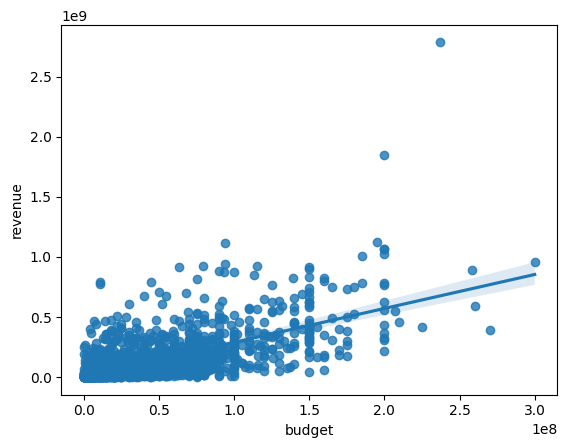

In [40]:
sb.regplot(x = "budget", y = "revenue", data = df)
plt.show()

Como podemos ver, orçamento tem uma correlação positiva alta com a bilheteria do filme. Em outras palavras, quanto mais se investe em um filme, existe uma tendência de o filme ter um maior alcance de divulgação, portanto aumentando o potencial de mais pessoas irem assisti-lo, podendo assim, ter um retorno sobre o investimento maior.

Filmes possuem diversos gêneros,que podem influenciar na bilheteria, pois está diretamente relacionado com a capacidade de atrair mais ou menos público. Por exemplo, um filme de terror tem uma capacidade consideravelmente menor de atrair grande público, dado que acarreta em uma classificação indicativa maior, limitando expressivamente a faixa hetária que terá acesso ao mesmo. 
Portanto, devemos levar em consideração dados referentes não apenas ao gênero de quem participou no desenvolvimento de toda a produção, mas dados referentes à obra artística também podem trazer maior contribuição para a análise.

A seguir, avaliaremos a contribuição de cada variável para a predição da bilheteria, a fim de analisar se de fato, uma porcentagem maior de mulheres impacta positivamente na predição do faturamento do filme.

In [41]:
feature_columns = ['budget', 'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'Animation', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult']

predict_variable = ['revenue']

In [49]:
x = df[feature_columns].values
y = df[predict_variable].values.flatten()

In [51]:
model = RandomForestClassifier()

In [52]:
model.fit(x, y)


RandomForestClassifier()

In [53]:
importance = model.feature_importances_

In [54]:
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_columns[i],v))

Feature: budget, Score: 0.17896
Feature: actress_percent, Score: 0.14709
Feature: actors_percent, Score: 0.14773
Feature: women_directing_percent, Score: 0.00666
Feature: men_directing_percent, Score: 0.00689
Feature: women_producing_percent, Score: 0.09474
Feature: men_producing_percent, Score: 0.09603
Feature: Animation, Score: 0.00734
Feature: Family, Score: 0.01418
Feature: Fantasy, Score: 0.01591
Feature: Musical, Score: 0.00622
Feature: Romance, Score: 0.02526
Feature: Music, Score: 0.00789
Feature: Adventure, Score: 0.02318
Feature: Drama, Score: 0.03338
Feature: Crime, Score: 0.02073
Feature: Thriller, Score: 0.02561
Feature: Documentary, Score: 0.00209
Feature: Horror, Score: 0.01284
Feature: Action, Score: 0.02443
Feature: Western, Score: 0.00563
Feature: Comedy, Score: 0.02805
Feature: War, Score: 0.00722
Feature: Sci-Fi, Score: 0.01975
Feature: Sport, Score: 0.00877
Feature: History, Score: 0.00731
Feature: Biography, Score: 0.00863
Feature: Mystery, Score: 0.01668
Feature:

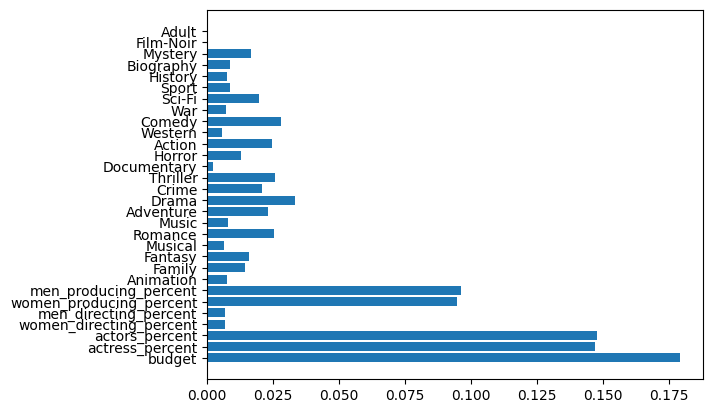

In [55]:
plt.barh([x for x in feature_columns], importance)
plt.show()

Como podemos observar, todas as variáveis contribuem positivamente para a construção da regressão. As variáveis de gênero social, contribuem praticamente de modo igual para a construção do modelo. Orçamento como esperado, é a variável que melhor contribiu para a predição da bilheteria, uma vez que observou-se a forte correlação entre as duas informações

Conclusão:

Podemos observar, que, apesar de a princípio a porcentagem de mulheres ter uma correlação até mesmo negativa e fraca com o faturamento, observamos que a porcentagem de homens também possiu uma correlação igualmente fraca, apesar de positiva. Além disso, foi constatado que o gênero social também não impacta na qualidade do filme. A partir disso, analisando os recortes por conjuntos de filmes em que a participação de mulheres foi maior que a de homens e o seu oposto, observamos que mesmo que o faturamento seja abaixo do seu contraposto, ainda que uma proporção muito pequena do total de filmes na base de dados, os filmes em que a proporção de mulheres é maior representam mais da metado da média de faturamento dos filmes cuja a proporção de homens é maior. Em outras palavras, apesar de representarem um número pequeno dentre o total de filmes presentes na base de dados, os filmes cuja concentração de mulheres atuando é maior que a de homens, conseguem fazer em média, mais da metade do que a proporção de filmes atuados majoritariamente por homens. (Os filmes em que podem ter procentagem igual em ambos os gêneros sociais não são o foco dessa análise)

Foram analisados outros aspectos que podem interferir no quanto os filmes com maioria feminina na atuação poderiam fazer. Aspectos de gênero entre produtores e diretores também podem impactar. Foi observado que independente do produtor ser um homem ou mulher, podemos ver a tendência da indústria de Hollywood em dar mais papéis para homens do que para mulheres. No entanto, podemos observar uma tendência de quando um filme é produzido por uma mulher, maior é a chance de uma mulher ser contratada para a direção, e isso fica mais evidente quando fazemos recorte pela direção, onde quando o filme é dirigido por uma mulher existe maior tendência na contratação de mulheres.

A partir disso, levando em consideração mais variáveis para além das questões de gênero social, podemos ver que as variáveis que representam os gêneros sociais contribuem igualmente, mesmo proporcionalmente existindo uma disparidade considerável como vimos anteriormente.

Assim, é possível inferir que a cultura da indústria de Hollywood de dar mais preferências para homens do que mulheres não faz muito sentido comercialmente. Isso nos diz que se aumentarmos a participação de mulheres na produção dos filmes, essa realidade pode ser bem diferente. Existe infelizmente o viés que contribui para uma maior média de faturamento para filmes com maior participação masculina nessa análise, tal que poderia ser minimizado se fosse possível adquirir dados mais recentes, dado que temos cada vez mais exemplos de filmes dirigidos, protagonizados e produzidos por mulheres, chegando até nos filmes de grande orçamento.